In [67]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

# Решение задачи Коши

Исходные данные: $$y' = y - 3x, y(1) = 0, x \in [1; 2.2], h = 0.3$$

In [68]:
f = lambda x, y: y - 3 * x
point = np.array([1, 0])
interval = np.array([1, 2.2])
h = 0.3

In [69]:
f_true = lambda x: -6 * np.exp(x - 1) + 3 * x + 3
x_linspace = np.linspace(1, 2.2, 1000)
y_linspace = f_true(x_linspace)

In [70]:
X = np.array([interval[0] + i * h for i in range(int((interval[1] - interval[0])/h) + 1)])
X

array([1. , 1.3, 1.6, 1.9, 2.2])

## Метод Эйлера

In [71]:
Y = [point[-1]]
for x in X[1:]:
    y = Y[-1]
    y_new = Y[-1] + h * f(x, y)
    Y.append(y_new)
Y

[0, -1.1700000000000002, -2.9610000000000003, -5.5593, -9.20709]

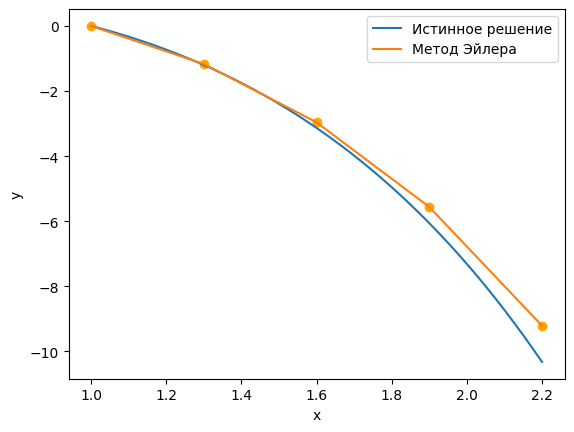

In [72]:
plt.plot(x_linspace, y_linspace);
plt.plot(X, Y);
plt.scatter(X, Y, color='orange');
plt.legend([
    'Истинное решение',
    'Метод Эйлера'
]);
plt.xlabel('x');
plt.ylabel('y');

## Модифицированный метод Эйлера

In [73]:
Y = [point[-1]]
for x in X[1:]:
    y = Y[-1]
    y_temp = Y[-1] + h * f(x, y)
    y_new = y + h * (f(x, y) + f(x + h, y_temp)) / 2
    Y.append(y_new)
Y

[0, -1.4805000000000001, -3.7822725, -7.1886565125, -12.0807430093125]

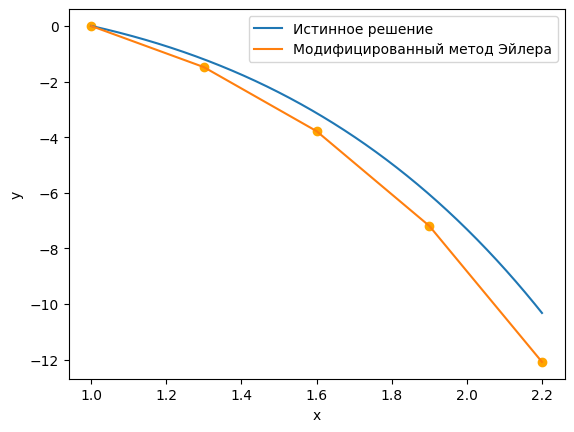

In [74]:
plt.plot(x_linspace, y_linspace);
plt.plot(X, Y);
plt.scatter(X, Y, color='orange');
plt.legend([
    'Истинное решение',
    'Модифицированный метод Эйлера'
]);
plt.xlabel('x');
plt.ylabel('y');

## Метод Рунге-Кутта

In [75]:
Y = [point[-1]]
for x in X[1:]:
    y = Y[-1]
    k0 = h * f(x, y)
    k1 = h * f(x + h/2, y + k0/2)
    k2 = h * f(x + h/2, y + k1/2)
    k3 = h * f(x + h, y + k2)
    y_new = y + (k0 + 2 * k1 + 2 * k2 + k3) / 6
    Y.append(y_new)
Y

[0, -1.51387875, -3.872222807203125, -7.370457803518048, -12.407360335356293]

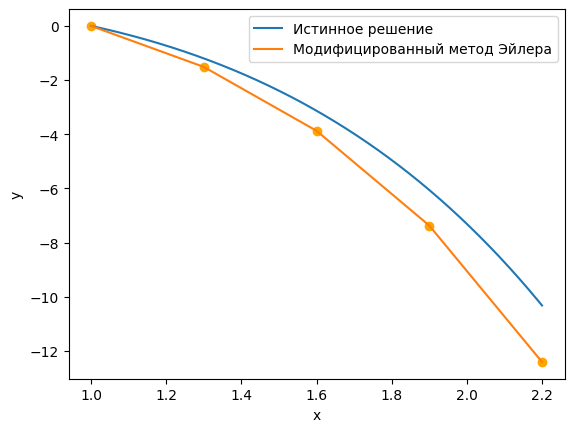

In [76]:
plt.plot(x_linspace, y_linspace);
plt.plot(X, Y);
plt.scatter(X, Y, color='orange');
plt.legend([
    'Истинное решение',
    'Модифицированный метод Эйлера'
]);
plt.xlabel('x');
plt.ylabel('y');

# Решение краевой задачи

Исходные данные: $$y'' + 2y' - xy = x^2, y'(0.6) = 0.7, y'(0.9) = 1$$

In [119]:
p = lambda x: 2
q = lambda x: -x
f = lambda x: x ** 2
a = 0.6
b = 0.9
h = 0.1
n = int((b - a) / h)
alpha = np.array([0, 1, 0.7])
beta = np.array([0, 1, 1])

In [120]:
X = np.array([a + i * h for i in range(n + 1)])
X

array([0.6, 0.7, 0.8, 0.9])

Формулы для коэффициентов в методе прогонки при $k = 1$:

$$(\alpha_1 - \frac{\alpha_2}{h})y_1 - \frac{\alpha_2}{h}y_2 = \alpha_3$$

Формулы для коэффициентов в методе прогонки при $k = \overline{2, n}$:

$$(\frac{1}{h^2} + \frac{p(x_k)}{2h})y_{k + 1} + (-\frac{2}{h^2} + q(x_k))y_{k} + (\frac{1}{h^2} - \frac{p(x_k)}{2h})y_{k - 1} = f(x_k)$$

Формулы для коэффициентов в методе прогонки при $k = n + 1$:

$$ -\frac{\beta_2}{h}y_{n - 1} + (\beta_1 + \frac{\beta_2}{h})y_{n} = \beta_3$$

In [125]:
matrix = np.array([
    [0, alpha[0] - alpha[1]/h, -alpha[1] / h, alpha[2]]
])
for k in range(1, n):
    matrix = np.vstack((matrix, np.array([
        [1 / h ** 2 + p(X[k]) / (2 * h), -2 / h ** 2 + q(X[k]), 1 / h ** 2 - p(X[k]) / (2 * h), f(X[k])]
    ])))
matrix = np.vstack((matrix, np.array([
    [-beta[1] / h, beta[0] + beta[1]/h, 0, beta[2]]
])))
matrix

array([[   0.  ,  -10.  ,  -10.  ,    0.7 ],
       [ 110.  , -200.7 ,   90.  ,    0.49],
       [ 110.  , -200.8 ,   90.  ,    0.64],
       [ -10.  ,   10.  ,    0.  ,    1.  ]])

In [122]:
def sweep_method(matrix: np.ndarray) -> np.ndarray:
    n = matrix.shape[0]
    U = [-matrix[0, 2]/matrix[0, 1]]
    V = [matrix[0, 3]/matrix[0, 1]]
    for i in range(1, n):
        U.append(-matrix[i, 2]/(matrix[i, 0] * U[i - 1] + matrix[i, 1]))
        V.append((matrix[i, 3] - matrix[i, 0] * V[i - 1])/(matrix[i, 0] * U[i - 1] + matrix[i, 1]))
    X = np.zeros(n)
    X[-1] += V[-1]
    for i in range(n - 2, -1, -1):
        X[i] += U[i] * X[i + 1] + V[i]
    R = np.zeros(n)
    R[0] += matrix[0, 3] - matrix[0, 1] * X[0] - matrix[0, 2] * X[1]
    R[-1] += matrix[-1, 3] - matrix[-1, 0] * X[-2] - matrix[-1, 1] * X[-1]
    for i in range(1, n - 1):
        R[i] += matrix[i, 3] - matrix[i, 0] * X[i - 1] - matrix[i, 1] * X[i] - matrix[i, 2] * X[i + 1]
    return X, R

In [126]:
Y = sweep_method(matrix)[0]
Y

array([-0.06367794, -0.00632206,  0.06917485,  0.16917485])

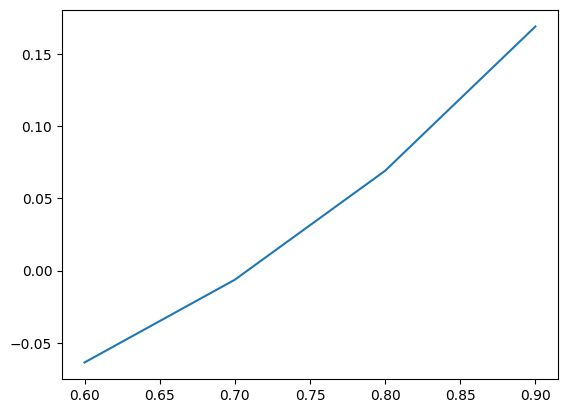

In [124]:
plt.plot(X, Y)